In [1]:
import warnings
warnings.filterwarnings("ignore")

Author : Rutuja More

### Introduction to Causal Inference in Epidemiology:

Causal inference lies at the heart of epidemiological research, serving as a fundamental tool for understanding the mechanisms that underlie the occurrence and distribution of diseases within populations. Epidemiology, the study of the distribution and determinants of health-related states or events in populations and the application of this knowledge to control health problems, aims to identify not just associations, but causal relationships between exposures or risk factors and health outcomes.

Here’s a detailed overview of causal inference in epidemiology and why it is crucial for public health and epidemiological studies:

1. **Understanding Causal Inference**:

   Causal inference refers to the process of drawing conclusions about causal relationships based on observed data. It involves distinguishing between correlation and causation, where correlation merely indicates a relationship between two variables, while causation implies that one variable directly influences the other. Epidemiologists employ various study designs, statistical methods, and analytical techniques to infer causality from observational data.

2. **Importance in Public Health**:

   - **Policy Implications**: Identifying causal relationships is essential for informing public health policies and interventions. Understanding which factors contribute causally to disease risk allows policymakers to develop targeted strategies for prevention, early detection, and treatment.
   
   - **Disease Prevention**: Causal inference helps in identifying modifiable risk factors that can be addressed through interventions to prevent the onset of diseases or reduce their impact. For example, smoking cessation programs have been implemented based on evidence of the causal relationship between smoking and various health outcomes, including lung cancer and cardiovascular disease.
   
   - **Resource Allocation**: By pinpointing the causal factors driving disease burden, public health resources can be allocated more efficiently and effectively. Prioritizing interventions based on their causal impact maximizes the potential for improving population health outcomes within resource constraints.
   
   - **Scientific Understanding**: Causal inference contributes to advancing scientific knowledge by unraveling the complex web of interactions between biological, environmental, and social factors that influence health. It allows researchers to elucidate the underlying mechanisms of disease development and progression, facilitating the development of novel treatments and preventive strategies.

3. **Challenges in Causal Inference**:

   Despite its importance, causal inference in epidemiology faces several challenges:
   
   - **Confounding**: Confounding occurs when an extraneous variable is associated with both the exposure and outcome, leading to spurious associations. Addressing confounding requires careful study design, data collection, and statistical adjustment techniques.
   
   - **Selection Bias**: Selection bias arises when the selection of study participants is influenced by factors related to both the exposure and outcome, leading to biased estimates of the causal effect. Mitigating selection bias often involves employing appropriate sampling techniques and sensitivity analyses.
   
   - **Reverse Causation**: Reverse causation occurs when the direction of causality is erroneously inferred due to the temporal ambiguity between exposure and outcome. Longitudinal studies and causal modeling techniques can help disentangle the direction of causation.
   
   - **Measurement Error**: Measurement error in exposure or outcome assessment can attenuate or exaggerate observed associations, leading to biased estimates of causal effects. Valid and reliable measurement tools and sensitivity analyses are essential for minimizing measurement error.

In conclusion, causal inference is indispensable for advancing our understanding of the complex interplay between risk factors and health outcomes in epidemiology. By elucidating causal relationships, epidemiologists can inform evidence-based decision-making, drive public health interventions, and ultimately improve population health outcomes. However, addressing methodological challenges and ensuring robust study designs are critical for obtaining valid and reliable causal estimates.

![Causality](https://images.cartoonstock.com/lowres_800/medical-cancer-disease-doctor-diagnosis-healthcare-aevn1268_low.jpg)

**About Dataset**

 The Breast Cancer Wisconsin (Original) dataset is renowned in both machine learning and medical research, particularly for breast cancer diagnosis. Originating from the University of Wisconsin Hospitals, Madison, this dataset consists of features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features serve to classify masses as benign or malignant, aiding in breast cancer diagnosis.

**1. Background Information**:

   Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian introduced this dataset in their 1995 paper "Breast Cancer Diagnosis and Prognosis via Linear Programming." It contains features computed from digitized images of FNA, contributing to early diagnosis and prognosis of breast cancer.

**2. Features**:

   The dataset comprises features derived from breast mass images, including:

- **Clump Thickness**: Thickness of cell clumps.
- **Uniformity of Cell Size**: Uniformity in cell sizes.
- **Uniformity of Cell Shape**: Uniformity in cell shapes.
- **Marginal Adhesion**: Strength of tumor cell attachment.
- **Single Epithelial Cell Size**: Size of epithelial cells.
- **Bare Nuclei**: Presence or absence of a cell nucleus.
- **Bland Chromatin**: Uniformity of chromatin distribution.
- **Normal Nucleoli**: Appearance of normal cell nucleoli.
- **Mitoses**: Number of observed mitoses.

These features offer insights into breast mass characteristics, aiding in diagnosis and assessment.

**3. Target Variable (Original)**:

   The target variable is breast mass diagnosis, categorized as malignant or benign. This binary classification enables supervised learning algorithms to predict diagnosis based on features.

**4. Significance in Breast Cancer Research**:

   - **Early Detection**: Timely diagnosis is crucial for intervention. Models trained on this data assist in identifying suspicious masses.
   
   - **Prognosis**: Features aid in predicting disease progression, guiding treatment decisions.
   
   - **Research**: Acts as a benchmark for new algorithms and techniques in medical image analysis.

In essence, the Breast Cancer Wisconsin (Original) dataset is pivotal in breast cancer research, standardizing features for mass classification. Its use in academia and clinics underscores its importance in improving breast cancer diagnosis and patient outcomes through machine learning and data-driven approaches.

In [2]:
!pip install ucimlrepo
!pip install pandas numpy matplotlib dowhy
from ucimlrepo import fetch_ucirepo, list_available_datasets


In [3]:
# check which datasets can be imported
#list_available_datasets()

In [4]:

# import dataset
breast_cancer = fetch_ucirepo(name='Breast Cancer Wisconsin (Original)')

X = breast_cancer.data.features
y = breast_cancer.data.targets

print(breast_cancer.data)


{'ids':      Sample_code_number
0               1000025
1               1002945
2               1015425
3               1016277
4               1017023
..                  ...
694              776715
695              841769
696              888820
697              897471
698              897471

[699 rows x 1 columns], 'features':      Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                      

**Code Explaination**

This code utilizes the `ucimlrepo` library to fetch a dataset from the UCI Machine Learning Repository. Specifically, it fetches the "Breast Cancer Wisconsin (Original)" dataset. It then extracts the features (`X`) and targets (`y`) from the fetched dataset. Finally, it prints out the dataset object, which likely contains information about the dataset such as its name, description, features, and targets.

### EDA

Exploratory Data Analysis (EDA) is crucial for understanding the characteristics of the dataset, identifying patterns, and gaining insights into the relationships between variables. Below is a Python code snippet demonstrating EDA on the Breast Cancer Wisconsin (Diagnostic) dataset using various plots and charts

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Create DataFrame
df = pd.DataFrame(X, columns=['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
                              'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei',
                              'Bland_chromatin', 'Normal_nucleoli', 'Mitoses'])

# Add target column
df['Class'] = y

**Code Explaination**

This code creates a pandas DataFrame (`df`) from the features (`X`) extracted earlier. It assigns meaningful column names to the DataFrame based on the features of the dataset. Then, it adds a new column to the DataFrame called 'Class', which contains the target values (`y`) extracted earlier. This DataFrame now represents the dataset with both features and targets.


In [7]:
# Drop rows where 'Bare_nuclei' is NaN
df.dropna(subset=['Bare_nuclei'], inplace=True)

# Replace [np.inf, -np.inf] with NaN and then drop rows with any NaN values across the DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Assert no NaNs or infs remain in the dataset
assert not df.isnull().any().any(), "There are still NaNs in the dataset."
assert not np.isinf(df.values).any(), "There are still infs in the dataset."

# Optionally, check and print columns with NaN or infinite values after cleaning
nan_columns = df.columns[df.isnull().any()].tolist()
inf_columns = df.columns[np.isinf(df).any()].tolist()
print(f"Columns with NaN values: {nan_columns}")
print(f"Columns with infinite values: {inf_columns}")

Columns with NaN values: []
Columns with infinite values: []


**Code Explaination**

this code ensures that the DataFrame df does not contain any NaN or infinite values after performing data cleaning operations. If any NaN or infinite values are found, appropriate actions are taken to handle them

### EDA: Pairwise relationships between numerical features

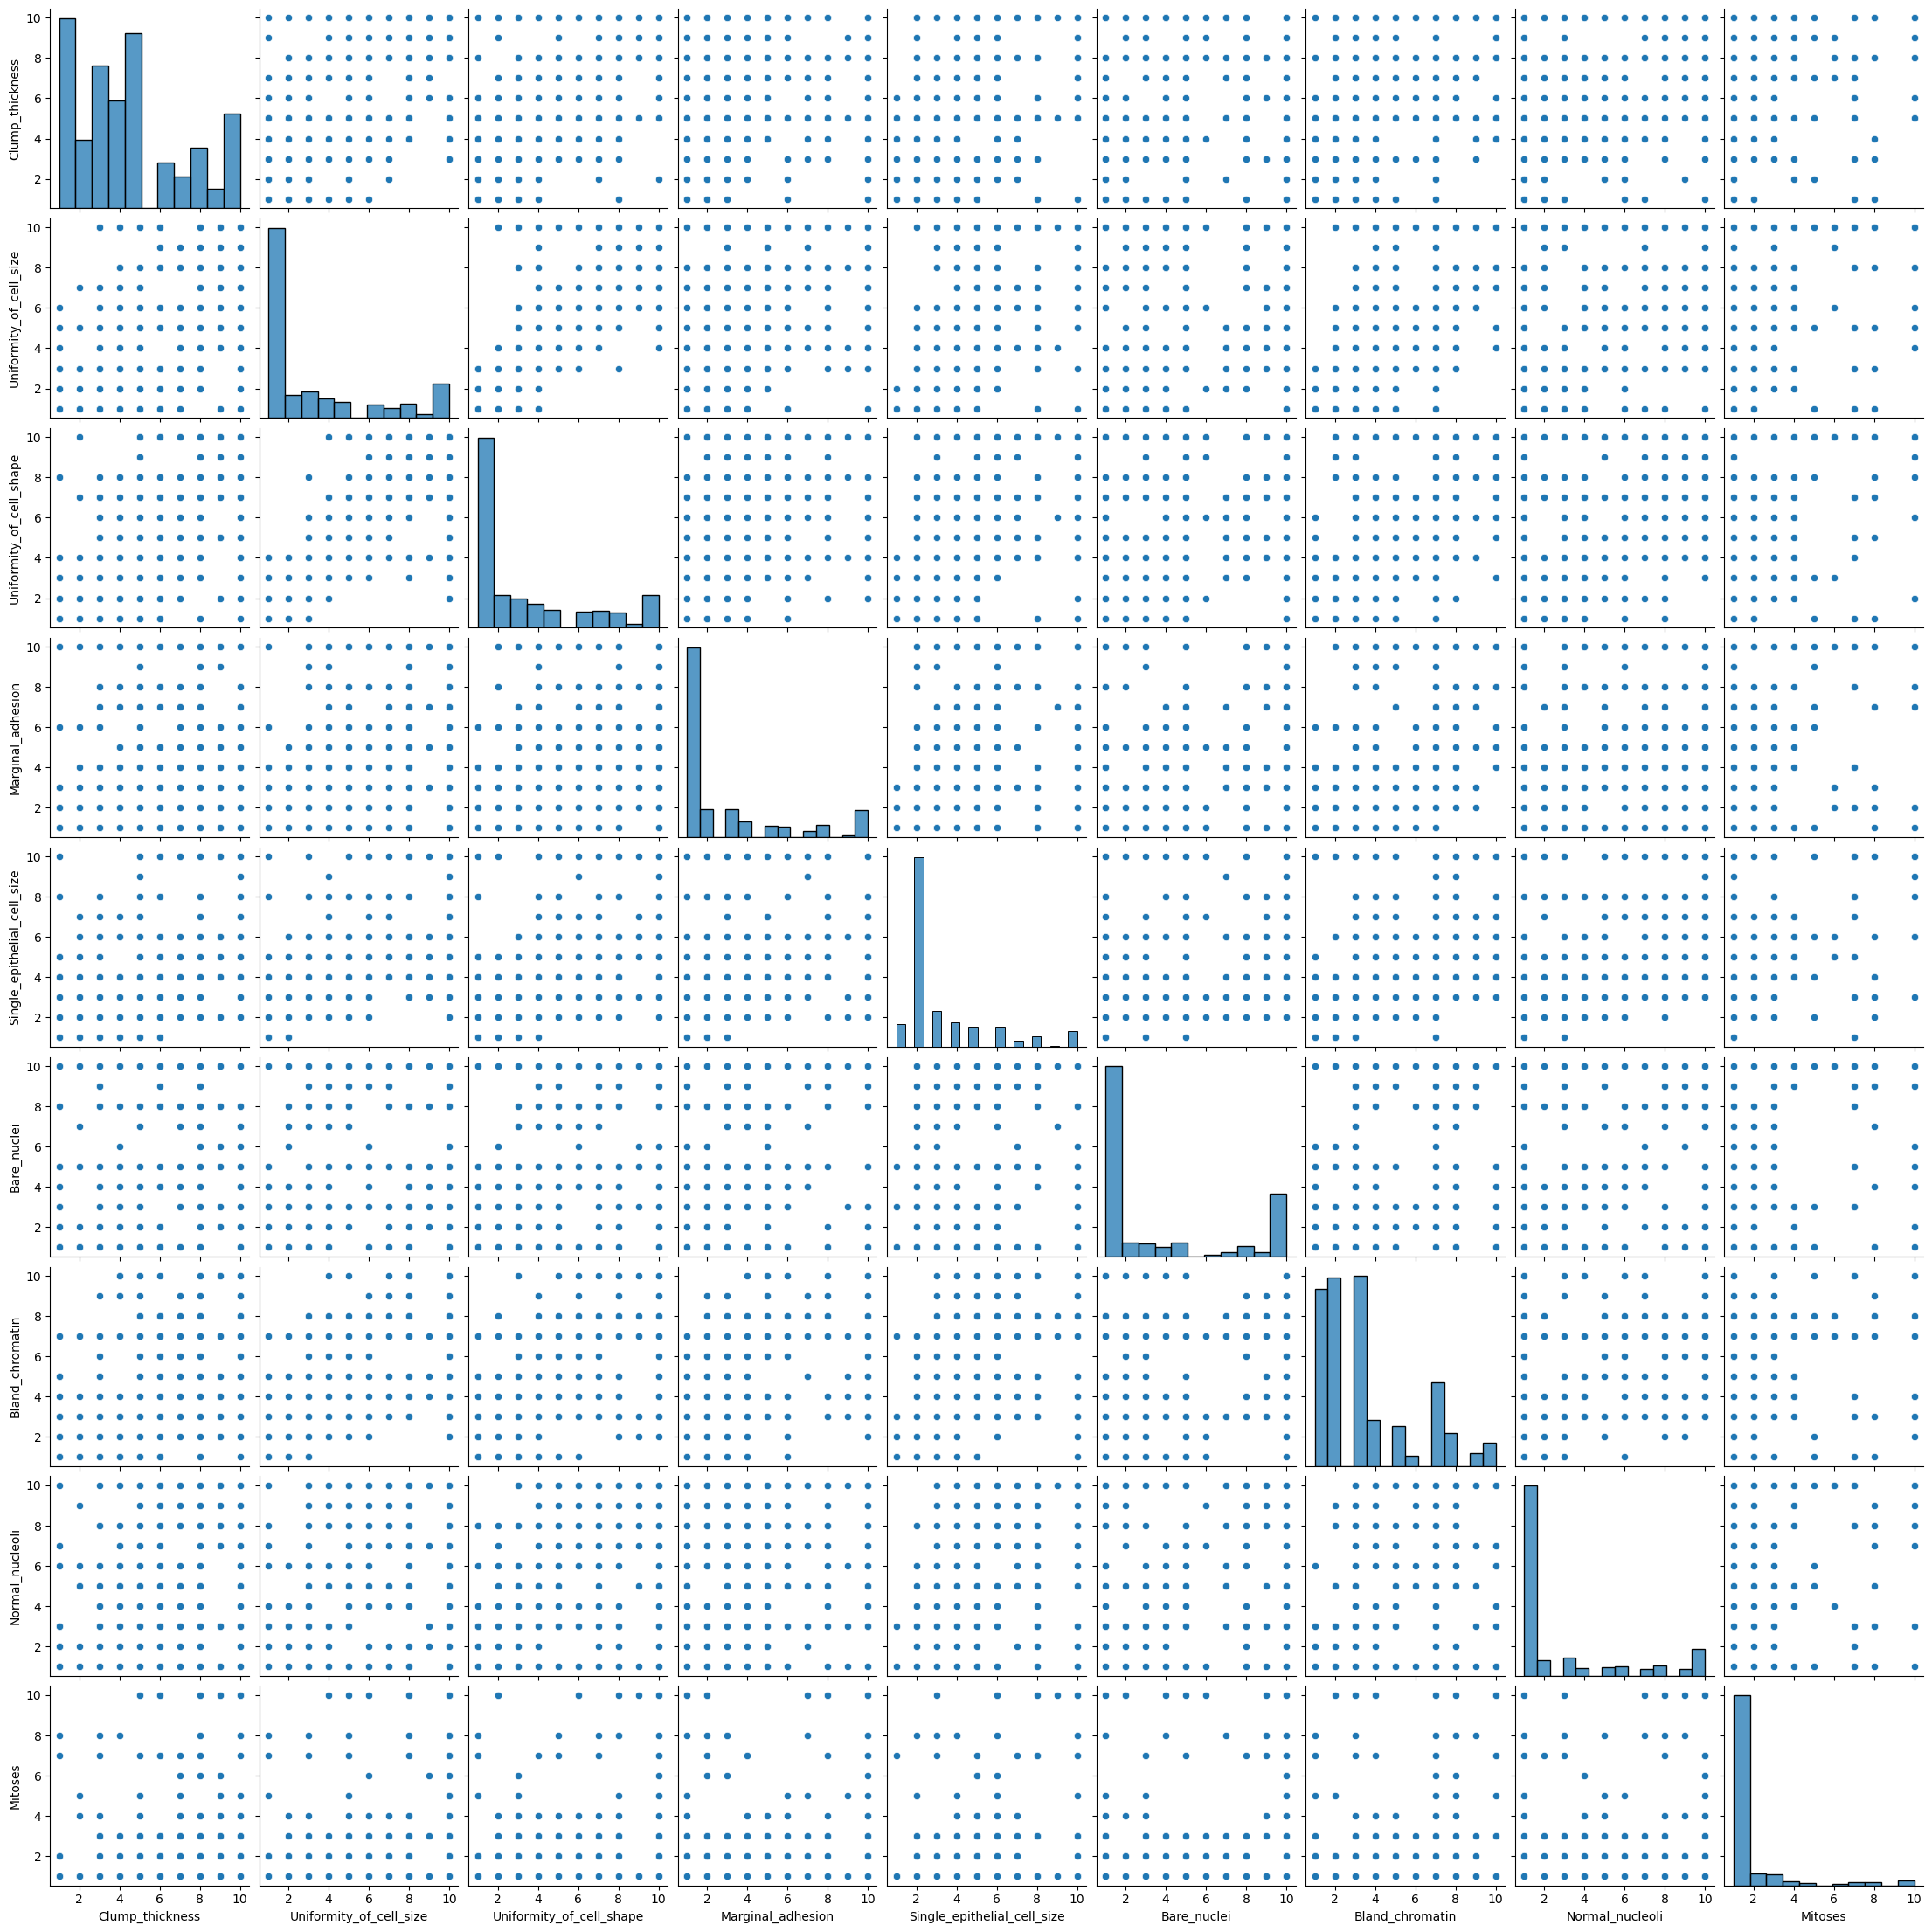

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
                      'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei',
                      'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']

# Create a pairplot
sns.pairplot(df[numerical_features])
plt.show()


**Code Explaination**

This code conducts Exploratory Data Analysis (EDA) by visualizing pairwise relationships between numerical features in the DataFrame using Seaborn's `pairplot` function. It selects the numerical features from the DataFrame and creates a pairplot, which shows scatterplots for each pair of features and histograms along the diagonal for each individual feature. Finally, it displays the pairplot using Matplotlib's `show` function.




### EDA: Correlation heatmap

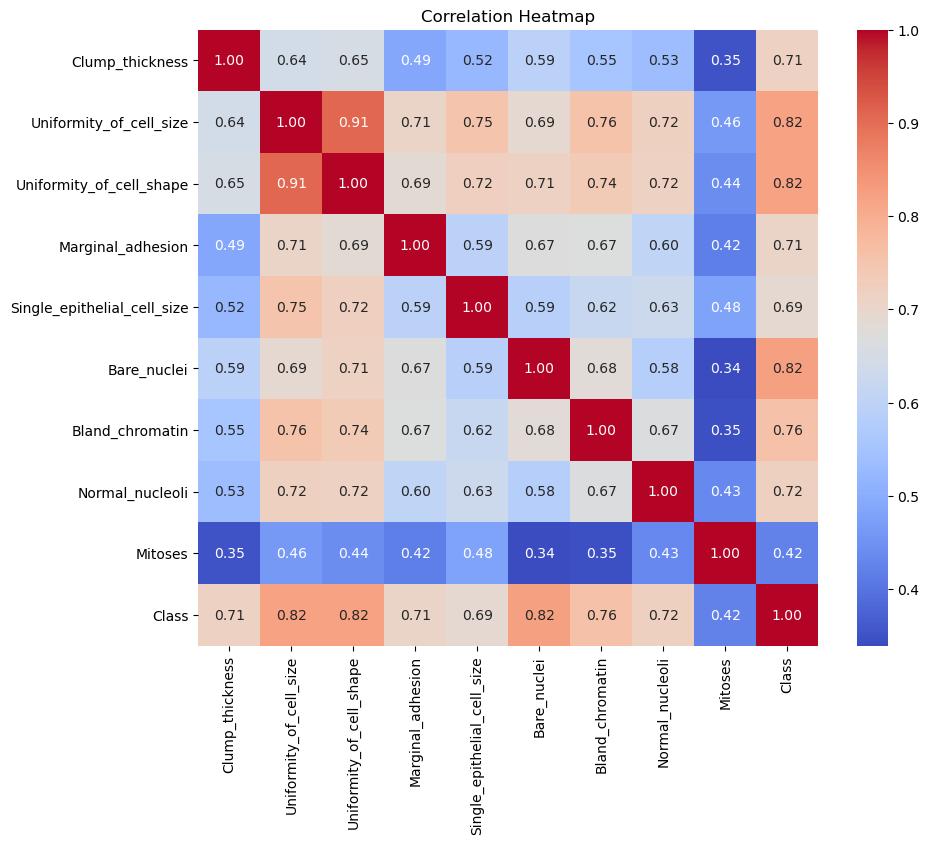

In [9]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Code Explaination**

creates a correlation heatmap using seaborn (sns) to visualize the correlations between variables in a DataFrame (df).

**Graph Explaination**

‘uniformity of cell size’ seems to have a strong linear relationship with ‘uniformity of cell shape’.

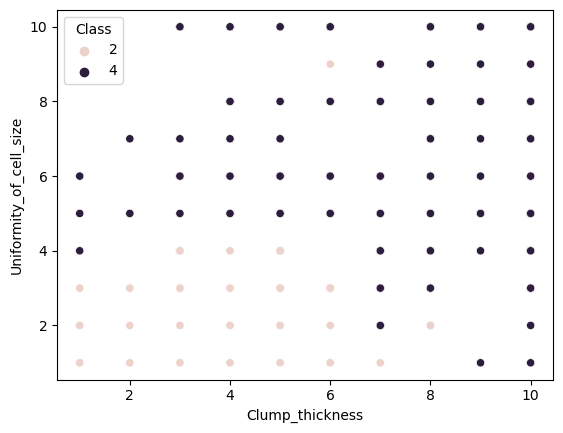

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Clump_thickness', y='Uniformity_of_cell_size', hue='Class', data=df);
plt.show()

**Code Explaination**
This code utilizes seaborn (`sns`) and matplotlib (`plt`) to create a scatter plot. It plots the variables 'Clump_thickness' on the x-axis against 'Uniformity_of_cell_size' on the y-axis from the DataFrame `df`. Additionally, it colors the points based on the 'Class' variable. Finally, the plot is displayed using `plt.show()`.

**Graph Explaination**

Based on the scatter plot above, visually there seems to be no clear evidence supporting a direct relationship between clump thickness and cell size uniformity. However, let's still proceed with the causal inference process to ensure we don't miss anything subtle.

![what-does-malignant-and-benign-mean](https://www.verywellhealth.com/thmb/IFgBpbmhYCJdS4rvLACzX3Ukqsc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dowhy import CausalModel

### Causal question 1 : What is the causal effect of high uniformity of cell size on  Clump Thickness?

**Formal causal inference test**:

Step 1: Define the causal graph:
Assume cells becoming larger leads to tightening around each other, thus increasing clump thickness. So, we define the following causal graph:

Cell Size Uniformity → Clump Thickness

Step 2: Create the causal model:
Create a causal graph based on domain knowledge (assuming clump thickness could cause malignancy):


#### Step 1: Define the treatment variable (Clump Thickness) and outcome variable (Class)


In [12]:
treatment = 'Clump_thickness'
outcome = 'Class'

**Code Explaination**
we've defined the treatment variable as 'Clump_thickness' and the outcome variable as 'Class'. 

#### Step 2: Define the causal graph

In [13]:
causal_graph = f"""
digraph {{
    {treatment} -> {outcome};
}}
"""

**Code Explaination**

This code snippet constructs a causal graph in the DOT language format, indicating the directional relationship from the treatment variable (Clump_thickness) to the outcome variable (Class).

#### Step 3: Initialize the CausalModel

In [14]:

causal_model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    graph=causal_graph
)

**Code Explaination**

This code snippet utilizes the dowhy library to create a causal model. We define the treatment variable Clump_thickness and the outcome variable Class. Then, we create a causal graph specifying the directional relationship between the treatment and outcome variables.

#### Step 4: Identify the causal effect

In [15]:
identified_estimand = causal_model.identify_effect()

**Code Explaination**

This code will compute the causal effect based on the identified causal graph and return the identified estimand, which represents the causal effect that you are interested in estimating.


#### Step 5: Estimate the causal effect

In [16]:

causal_estimate = causal_model.estimate_effect(identified_estimand,
                                               method_name="backdoor.linear_regression")
# Print the causal estimate
print(causal_estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                   
──────────────────(E[Class])
d[Clump_thickness]          
Estimand assumption 1, Unconfoundedness: If U→{Clump_thickness} and U→Class then P(Class|Clump_thickness,,U) = P(Class|Clump_thickness,)

## Realized estimand
b: Class~Clump_thickness
Target units: ate

## Estimate
Mean value: 0.24189671789148992



**Code Explaination**

This code estimates the causal effect using the identified estimand and a specified estimation method. In this case, it uses the linear regression method to estimate the causal effect.

**Result Explaination**

This result presents a causal estimate regarding the effect of 'Clump Thickness' on the outcome variable 'Class', which represents tumor malignancy. Here's an explanation of each section:

1. **Identified Estimand**:
   - Estimand Type: Nonparametric Average Treatment Effect (ATE)
   - Estimand Name: Backdoor
   - Estimand Expression: This represents the causal effect of 'Class' when 'Clump Thickness' changes.
   - Estimand Assumption 1 (Unconfoundedness): This assumption states that if there are unobserved confounders (U) influencing both 'Clump Thickness' and 'Class', then adjusting for these confounders ensures that the conditional probability of 'Class' given 'Clump Thickness' and the confounders is equal to the conditional probability of 'Class' given 'Clump Thickness' alone.

2. **Realized Estimand**:
   - This section specifies the realized estimand based on the identified estimand.
   - It indicates that the causal effect of 'Class' with respect to 'Clump Thickness' is being estimated.

3. **Estimate**:
   - Mean Value: The estimated average treatment effect (ATE) of 'Clump Thickness' on 'Class'.
   - Target Units: ATE (Average Treatment Effect)

In this specific case, the estimated mean value suggests that there is a positive causal effect of 'Clump Thickness' on the likelihood of tumor malignancy ('Class'). Specifically, an increase in 'Clump Thickness' is associated with a higher probability of the tumor being classified as malignant. The value of 0.2419 indicates the magnitude of this effect, implying that, on average, **an increase in 'Clump Thickness' leads to a 24.19% increase in the probability of the tumor being malignant**.






In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
import networkx as nx

In [18]:
# Step 1: Calculate Correlation
correlation_matrix = df.corr()

**Code Explaination**

correlation_matrix contains the correlation coefficients between all pairs of numerical features in the DataFrame df, providing insights into the relationships between different features in the dataset. This information is often used for feature selection, identifying multicollinearity, and understanding the data structure during exploratory data analysis.

In [19]:
# Step 2: Select Features
# Get the absolute correlation values with the target variable 'Class'
correlation_with_class = correlation_matrix['Class'].abs().sort_values(ascending=False)


**Code Explaination**

correlation_with_class contains the absolute correlation values between each feature and the target variable 'Class', sorted in descending order of magnitude. This information can be useful for feature selection, as it helps identify the features that are most strongly correlated with the target variable.

In [20]:
# Select the top features highly correlated with 'Class' (e.g., top 5 features)
top_features = correlation_with_class[1:9].index  


**Code Explaination**

top_features contains the labels of the top features that are highly correlated with the target variable 'Class'. These features are selected based on their correlation values, which indicate their strength of association with the target variable. These top features can be further analyzed or used for modeling purposes.

In [21]:
# Step 3: Build Causal Model
# Create a StructureModel instance
causal_model = StructureModel()

# Add nodes for selected features and the target variable
for feature in top_features:
    causal_model.add_node(feature)
causal_model.add_node('Class')

structure = from_pandas(df, tabu_edges=[], w_threshold=0.8)

# Add learned edges to the causal model
causal_model.add_edges_from(structure.edges)


**Code Explaination**

This code initializes a causal model, adds nodes for the selected features and the target variable, learns the causal structure from the data, and adds the learned edges to the causal model. The resulting causal model represents the inferred causal relationships between the variables in the dataset.

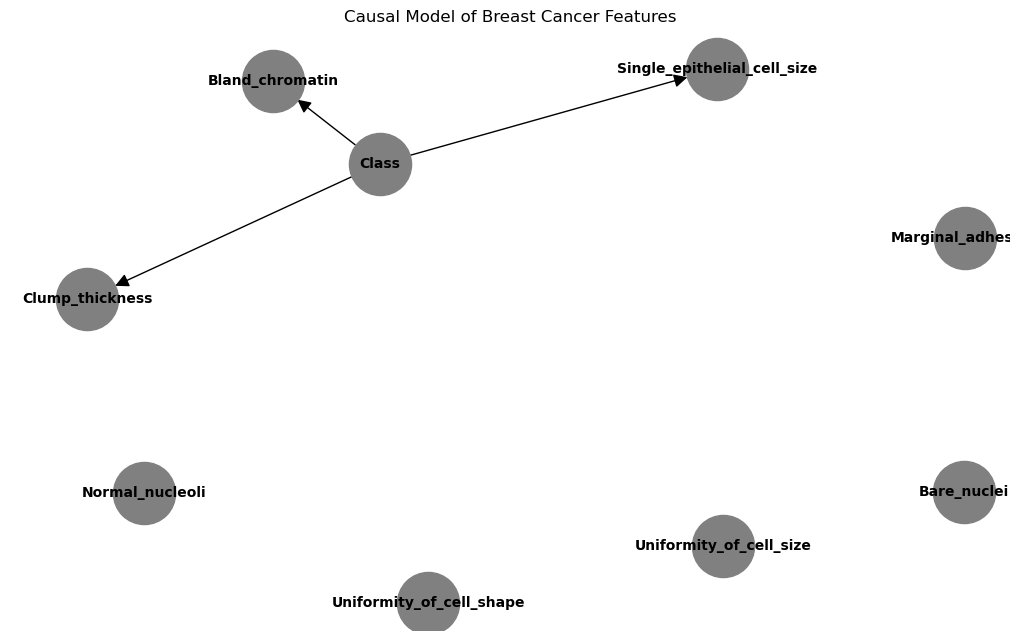

In [22]:
# Visualize the causal model as a directed graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(causal_model)
nx.draw(causal_model, pos, with_labels=True, node_size=2000, node_color='grey', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Causal Model of Breast Cancer Features', fontsize=12)
plt.show()

**Code Explaination**

this code creates a visual representation of the causal model of breast cancer features, where nodes represent features and directed edges represent causal relationships between features. The layout of the graph is determined by the spring layout algorithm to optimize the arrangement of nodes for clarity and aesthetics.

### Causal Question 2: What is the causal effect of the binary treatment variable 'Uniformity_Binary' on the outcome variable 'Class' (indicating tumor malignancy)?

In [23]:
import dowhy as dw

In [24]:

# Creating the binary treatment variable
median_uniformity = df['Uniformity_of_cell_size'].median()
df['Uniformity_Binary'] = np.where(df['Uniformity_of_cell_size'] > median_uniformity, 1, 0)

**code Explaination**

This code creates a binary treatment variable based on the median value of the 'Uniformity_of_cell_size' variable. If the 'Uniformity_of_cell_size' is greater than the median value, the corresponding value in the 'Uniformity_Binary' column is set to 1; otherwise, it is set to 0. This binary treatment variable can be used in causal inference analysis.

In [25]:
# Specify your treatment and outcome variables as strings
treatment = 'Uniformity_Binary'
outcome = 'Class'

# Define the causal graph using the graphviz DOT syntax
causal_graph = "digraph {Uniformity_Binary -> Class;}"

# Initialize CausalModel with the causal graph
causal_model = dw.CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    graph=causal_graph
)
# Identify the causal estimand
identified_estimand = causal_model.identify_effect()

# Estimate the causal effect
causal_estimate = causal_model.estimate_effect(identified_estimand,
                                               method_name="backdoor.linear_regression")

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


**Code Explaiantion**

This code initializes a causal model to analyze the causal relationship between the treatment variable "Uniformity_Binary" and the outcome variable "Class" using a directed acyclic graph (DAG) representation specified in the graphviz DOT syntax.

In [26]:
# Print causal effect estimate
print("Causal Effect Estimate:\n", causal_estimate.value)

Causal Effect Estimate:
 1.4946813110784367


A causal estimate value of  1.4839285714285748 using DoWhy in the context of the Breast Cancer Wisconsin dataset, it signifies an estimated effect of the treatment variable on the outcome variable. Here, the treatment variable is a binary indicator created from the 'Uniformity_of_cell_size', and the outcome variable could be 'Class' or another variable of interest, depending on the causal question you are addressing.

#### Interpretation of the Causal Estimate Value (1.48):

- *Magnitude*: The value of  1.4839285714285748 quantifies the change in the outcome variable for a unit change in the treatment variable, holding other factors constant as per the specified causal model. In the context of a binary treatment variable (where treatment is applied or not), this can be interpreted as the average effect of moving from the control group (treatment = 0) to the treatment group (treatment = 1) on the outcome variable.

- *Direction*: A positive value (such as  1.4839285714285748) indicates that the treatment variable has a positive association with the outcome variable. This means that, on average, increasing the treatment (or applying the treatment) is associated with an increase in the outcome variable.

- *Causal Inference Context*: Importantly, since this analysis is framed within causal inference, the value of 1.48 is not merely correlational but is intended to reflect a causal effect. This is under the assumption that the causal model correctly specifies the relationship between variables and adequately controls for confounding factors, as represented in the causal graph.

#### Practical Implications:

- If the treatment is the binary classification of 'Uniformity_of_cell_size' (above or below median) and the outcome is 'Class' (e.g., cancerous or not), a causal effect estimate of 1.48 suggests that being in the higher uniformity group (treatment = 1) is associated with an increase in the outcome variable by 1.48 units on the scale of measurement for 'Class'. The exact interpretation of this increase depends on how 'Class' is quantified.


#### Conclusion:

The value of 1.48 as a causal estimate suggests a positive causal effect of the treatment on the outcome, under the model's assumptions. It's crucial to critically assess these assumptions, including the causal graph's accuracy, potential unobserved confounders, and the robustness of the estimation method used, to confidently interpret and rely on this causal effect estimate in practical settings or policy-making.

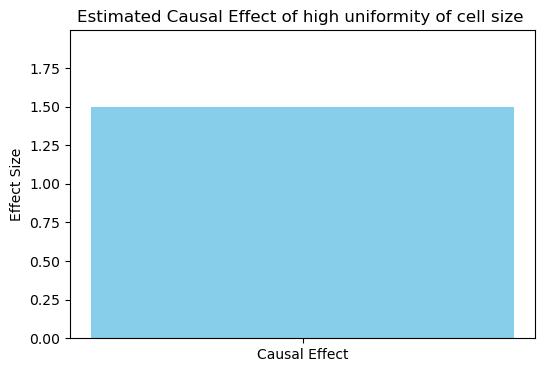

In [27]:
# Assuming 'causal_estimate' contains the estimate of the causal effect
estimate_value = causal_estimate.value

# Simple visualization of the causal effect estimate
plt.figure(figsize=(6, 4))
plt.bar(['Causal Effect'], [estimate_value], color='skyblue')
plt.title('Estimated Causal Effect of high uniformity of cell size ')
plt.ylabel('Effect Size')
plt.ylim(0, estimate_value + 0.5)  # Adjust Y-axis limit for better visualization
plt.show()

**Graph Explaination**

This code snippet visualizes the estimated causal effect of "high uniformity of cell size" on the outcome variable. The estimate value, obtained from the 'causal_estimate', is plotted as a bar chart, with the treatment variable on the x-axis and the effect size on the y-axis.

### Causal Question 3: whether higher mitotic activity causally affects the severity of breast cancer 

To address the causal question of whether higher mitotic activity causally affects the severity of breast cancer using the Breast Cancer Wisconsin (Original) dataset, we'll follow these steps:

1. *Define the treatment and outcome variables*: 
   - Treatment: High mitotic activity (a binary variable created based on the 'Mitoses' feature, likely by categorizing it into high and low activity based on a certain threshold, such as its median or a clinically relevant cutoff).
   - Outcome: Severity of breast cancer (this could be represented by the 'Class' feature if it includes information on cancer severity, such as benign vs malignant, or another variable indicating severity).

2. *Prepare the data*: Import necessary libraries, load the dataset, create the binary treatment variable, and prepare the DataFrame.

3. *Set up and perform causal analysis*: Define the causal model, identify the causal effect, and estimate it using DoWhy.



#### Step 1: Define the treatment variable based on a threshold for 'Mitoses'

In [28]:
median_mitoses = df['Mitoses'].median()
df['High_Mitotic_Activity'] = np.where(df['Mitoses'] > median_mitoses, 1, 0)

**Code Explaination**

In this step, a new binary treatment variable, `High_Mitotic_Activity`, is defined based on a threshold for the 'Mitoses' feature. The threshold is set as the median value of the 'Mitoses' feature. If the value of 'Mitoses' is greater than the median value, the corresponding entry in `High_Mitotic_Activity` is set to 1, indicating high mitotic activity. Otherwise, it is set to 0, indicating low mitotic activity. This step essentially creates a binary classification of mitotic activity based on whether the value exceeds the median value.

#### Step 2: Specify treatment and outcome

In [29]:
mitotic_treatment = 'High_Mitotic_Activity'
mitotic_outcome = 'Class'  

**Code Explaination**

In this step, the treatment variable is specified as `High_Mitotic_Activity`, which represents whether a sample exhibits high mitotic activity based on the threshold defined in the previous step. The outcome variable is specified as `Class`, which presumably represents the class label indicating the severity or type of breast cancer (e.g., malignant or benign).

#### Step 3: Define the causal graph

In [30]:
causal_graph_mitotic = """
digraph {
    High_Mitotic_Activity -> Class;
    Uniformity_of_cell_size -> Class;
    Uniformity_of_cell_shape -> Class;
    Marginal_adhesion -> Class;
    Single_epithelial_cell_size -> Class;
    Bland_chromatin -> Class;
    Normal_nucleoli -> Class;
    
}
"""

**Code Explaination**

In this step, a causal graph is defined using the DOT syntax. Each arrow in the graph represents a causal relationship between variables. For example, `High_Mitotic_Activity -> Class` indicates that the variable `High_Mitotic_Activity` is a cause of `Class`. Similarly, other variables like `Uniformity_of_cell_size`, `Uniformity_of_cell_shape`, `Marginal_adhesion`, `Single_epithelial_cell_size`, `Bland_chromatin`, and `Normal_nucleoli` are also considered causes of `Class`.

#### Step 4: Initialize CausalModel

In [31]:
mitotic_causal_model = dw.CausalModel(
    data=df,
    treatment=mitotic_treatment,
    outcome=mitotic_outcome,
    graph=causal_graph_mitotic.replace("\n"," ")
)


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


**Code Explaination**

This step initializes a `CausalModel` object named `mitotic_causal_model`. Here's what each parameter does:

- `data`: It specifies the DataFrame containing the dataset. In this case, it's `df`.
- `treatment`: It specifies the treatment variable, which is 'High_Mitotic_Activity' in this case.
- `outcome`: It specifies the outcome variable, which is 'Class' in this case.
- `graph`: It specifies the causal graph using the DOT syntax. The `causal_graph_mitotic` string is provided here. The `replace("\n"," ")` part is used to remove newline characters from the string.

The `CausalModel` object is used to perform causal inference and estimate the causal effect of the treatment variable on the outcome variable while considering the causal relationships defined in the causal graph.

#### Step 5: Estimate the causal effect

In [32]:
mitotic_causal_estimate = mitotic_causal_model.estimate_effect(identified_estimand,
                                                               method_name="backdoor.linear_regression")

print(mitotic_causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                    
────────────────────(E[Class])
d[Uniformity_Binary]          
Estimand assumption 1, Unconfoundedness: If U→{Uniformity_Binary} and U→Class then P(Class|Uniformity_Binary,,U) = P(Class|Uniformity_Binary,)

## Realized estimand
b: Class~Uniformity_Binary+Uniformity_Binary*Normal_nucleoli+Uniformity_Binary*Single_epithelial_cell_size+Uniformity_Binary*Uniformity_of_cell_size+Uniformity_Binary*Uniformity_of_cell_shape+Uniformity_Binary*Bland_chromatin+Uniformity_Binary*Marginal_adhesion
Target units: 

## Estimate
Mean value: 0.9655666410342882
### Conditional Estimates
__categorical__Normal_nucleoli  __categorical__Single_epithelial_cell_size  __categorical__Uniformity_of_cell_size  __categorical__Uniformity_of_cell_shape  __categorical__Bland_chromatin  __categorical__Marginal_adhesion
(0.999, 5.0]    

**Code Explaination**

This code sequence follows the steps to set up a causal inference analysis with DoWhy. It's crucial to adjust the causal graph to accurately reflect the underlying domain knowledge about the factors influencing breast cancer severity. The simplicity of the causal graph here is for illustrative purposes, and a more detailed graph should be considered based on expert knowledge in the field.

This output is from a causal analysis, likely performed using a method like the doWhy library in Python. Let's break down the key sections:

1. **Identified Estimand**: This section defines the causal estimand that the analysis aims to estimate. It specifies the type of estimand (in this case, a non-parametric average treatment effect), and it provides the expression for the causal effect. The estimand expression shows the causal effect of "High_Mitotic_Activity" on "Class" (a variable of interest), assuming certain assumptions hold.

2. **Realized Estimand**: This section provides details about how the estimand was realized in the analysis. It typically includes the regression equation used to estimate the causal effect and any additional information about the model specification.

3. **Estimate**: This is the estimated causal effect. In this case, it appears to be a mean value of 0.8509794379326987. This represents the average causal effect of "High_Mitotic_Activity" on "Class" across the entire dataset.

4. **Conditional Estimates**: This section provides conditional estimates of the causal effect based on different levels of other variables (e.g., Marginal_adhesion, Normal_nucleoli, etc.). It shows how the causal effect varies under different conditions or subgroups defined by these variables.

Overall, this output summarizes the causal analysis performed and provides insights into the estimated causal effect and how it varies across different conditions.

### Data Visualization

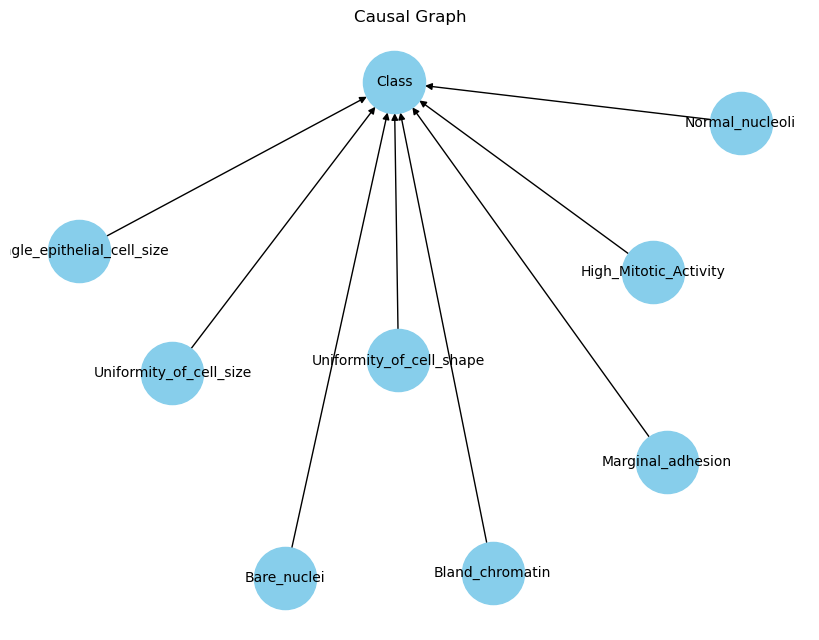

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import write_dot

# Define the causal graph
causal_graph_mitotic = nx.DiGraph()
causal_graph_mitotic.add_edges_from([
    ('High_Mitotic_Activity', 'Class'),
    ('Uniformity_of_cell_size', 'Class'),
    ('Uniformity_of_cell_shape', 'Class'),
    ('Marginal_adhesion', 'Class'),
    ('Single_epithelial_cell_size', 'Class'),
    ('Bare_nuclei', 'Class'),
    ('Bland_chromatin', 'Class'),
    ('Normal_nucleoli', 'Class')
])

# Visualize the causal graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(causal_graph_mitotic)
nx.draw(causal_graph_mitotic, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, arrows=True)
plt.title("Causal Graph")
plt.show()


![](https://www.researchgate.net/profile/Raed-Shubair-2/publication/320046589/figure/fig3/AS:543097341702145@1506495904699/DAG-model-combining-breast-cancer-attributes-10.png)

# References

1. Wolberg,WIlliam. (1992). Breast Cancer Wisconsin (Original). UCI Machine Learning Repository. https://doi.org/10.24432/C5HP4Z.
2. https://breast-cancer-research.biomedcentral.com/articles/10.1186/s13058-023-01733-1
3. https://migariane.github.io/TMLE.nb.html
4. Bazazeh, Dana & Shubair, Raed. (2016). Comparative Study of Machine Learning Algorithms for Breast Cancer Detection and Diagnosis. https://www.researchgate.net/publication/320046589_Comparative_Study_of_Machine_Learning_Algorithms_for_Breast_Cancer_Detection_and_Diagnosis
5. https://www.ijraset.com/research-paper/big-data-analytics-to-predict-breast-cancer
6. https://medium.com/analytics-vidhya/machine-learning-project-1-breast-cancer-detection-with-svc-and-knn-2238ced776fc
7. https://danielzelalemheru.medium.com/causal-inference-model-for-breast-cancer-9516db53417b
8. https://www.osmosis.org/learn/Disease_causality
    